In [44]:
import numpy as np
from reservoirpy import nodes, datasets, observables
import reservoirpy as rpy
import matplotlib.pyplot as plt  
import random
import copy       
import hierarchical_genomes as hg
from expt_helper_functions import create_initial_genome, select_best_genomes, reproduce, log_generation_results, analyze_results,mae,mse,calculate_diversity_score, should_increase_timestep,visualize_genome,mutate_hox,mutate_hox_new

In [15]:
X = datasets.mackey_glass(n_timesteps=1000, sample_len=2000)

In [16]:
genome = [[10,2,7], [4,8,6],[9,5,3]]    
n_steps_to_predict = 10


Running Model-3: 500it [00:00, 13729.85it/s]          
Running Model-3: 100%|██████████| 1/1 [00:00<00:00, 26.07it/s]

Fitting node Ridge-3...


Running Model-3: 490it [00:00, 16594.88it/s]          


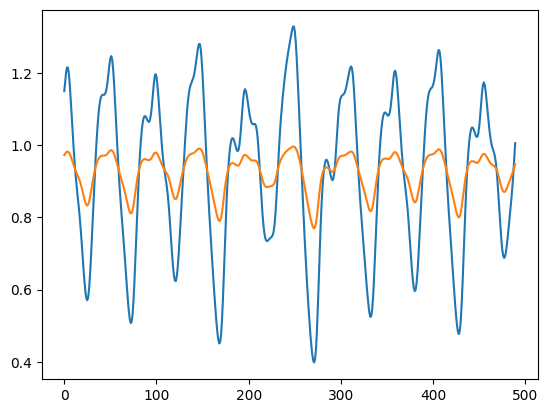

In [17]:

# Convert genome to neural network (function from your thesis code)
weight_matrix = hg.transcribe_hierarchical_genome_to_weight_matrix(genome)

# Setup the Echo State Network
esn = nodes.Reservoir(W=weight_matrix) >> nodes.Ridge(ridge=1e-6)

# Train and forecast using the ESN
#forecast = esn.fit(X[:500], X[1:501]).run(X[503:])

# Calculate fitness (e.g., using RMSE)
#fitness_score = observables.rmse(forecast, X[503:])

# Train and forecast using the ESN
forecast = esn.fit(X[:500], X[n_steps_to_predict:500+n_steps_to_predict]).run(X[500+n_steps_to_predict:])

# Calculate fitness (using RMSE and MAE)
# fitness_rmse = observables.rmse(forecast, X[503:])
# fitness_mae = mae(forecast, X[test_start:])
# fitness_mse = mse(forecast, X[test_start:])


#return {'rmse': fitness_rmse, 'mae': fitness_mae, 'mse': fitness_mse}

plt.plot(X[500+n_steps_to_predict:], label='True')
plt.plot(forecast, label='Forecast')    

In [39]:
mutated_genome = mutate_hox(copy.deepcopy(genome), 1)

In [40]:
print(genome)
print(mutated_genome)

[[10, 2, 6.879013663380521], [4, 8, 6.126201338858795], [9, 5, 2.9425798888892465]]
[[10, 2, 6.836576722807262], [4, 8, 6.1022892658274746], [9, 5, 2.9588146488600944]]


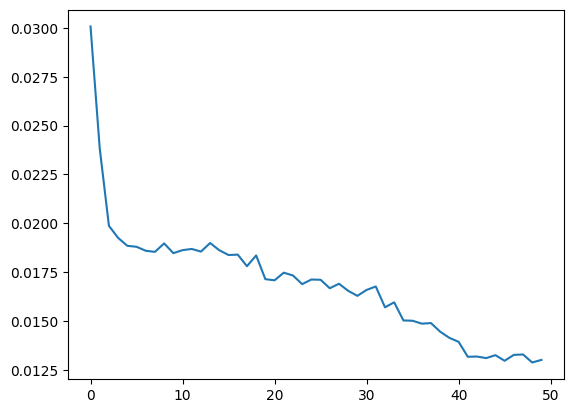

In [68]:
population_size=5
genome = [[1,2,-0.1], [2,3,0.1],[3,4,0.2], [4,5,-0.1], [5,6,0.3],[6,7,0.3] ]  
population = [copy.deepcopy(genome)  for _ in range(population_size)]  # create a deep copy of the genome
n_steps_to_predict = 2
best_mae_score = []
rpy.verbosity(0)
best_mae_ovr_gen=[]


for i in range(50):
    
    best_mae = []
    mutated_genome_list = []
    
    for genome in population:
        mutated_genome = mutate_hox(copy.deepcopy(genome), 1)
        
        mutated_genome_list.append(mutated_genome)
        
        weight_matrix = hg.transcribe_hierarchical_genome_to_weight_matrix(mutated_genome)

        esn = nodes.Reservoir(Win=np.ones((8,1)), W=weight_matrix, bias=np.zeros((8,1))) >> nodes.Ridge(ridge=1e-6)

        forecast = esn.fit(X[:500], X[n_steps_to_predict:500+n_steps_to_predict]).run(X[500+n_steps_to_predict:])
    
        best_mae_score = np.mean(np.abs(forecast[:-n_steps_to_predict] - X[500+n_steps_to_predict * 2:]))
        
        best_mae.append(best_mae_score)
        
    #np.argmin(best_mae)
    #print("Generation "+ str(i) + " : " + str(best_mae[np.argmin(best_mae)]))
    
    
    
    population = [copy.deepcopy(mutated_genome_list[np.argmin(best_mae)])  for _ in range(population_size)]
    
    best_mae_ovr_gen.append(best_mae[np.argmin(best_mae)])
    #plt.plot(X[500+n_steps_to_predict:], label='True')
plt.plot(best_mae_ovr_gen, label='Best MAE')



In [45]:
a1 = np.array([1,2,3])
a2 = np.array([4,5,6])
print(a2-a1)

[3 3 3]
